# Rotated randomly

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import numpy as np
from PIL import Image
import os

In [31]:
path_to_image_files = []
imagePath = 'test/'
# imagePath = 'images/'
f = []
for (dirpath, dirnames, filenames) in os.walk(imagePath):
    f.extend(filenames)
    break
for path in f:
    if path.split('.')[-1] == 'png' or path.split('.')[-1] == 'jpg':
        path_to_image_files.append(imagePath + path)

In [32]:
for filename in path_to_image_files:
    for i in range(200):
        img = Image.open(path_to_image_files[0])
        img = img.rotate(60 * (random.random()-0.5))
        img.save(imagePath + 'rotated/' + str(int(1000*random.random())) + '_' + filename.split('_')[-1])

# Viewing the result

In [2]:
from defaults import Config as defaults
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from model import Model
tf.logging.set_verbosity(tf.logging.ERROR)

In [3]:
path_to_image_files = []
imagePath = 'test/rotated/'
f = []
for (dirpath, dirnames, filenames) in os.walk(imagePath):
    f.extend(filenames)
    break
for path in f:
    if path.split('.')[-1] == 'png' or path.split('.')[-1] == 'jpg':
        path_to_image_files.append(imagePath + path)


In [4]:
dataset_path = 'train_tickets.tfrecords'
num_epoch = 2
batch_size = 64
steps_per_checkpoint = 30
max_prediction_length = 13
initial_learning_rate = 1.0
sess = tf.InteractiveSession(config=tf.ConfigProto(allow_soft_placement=True))
model = Model(
    phase='predict',
    visualize=defaults.VISUALIZE,
    output_dir=defaults.OUTPUT_DIR,
    batch_size=batch_size,
    initial_learning_rate=initial_learning_rate,
    steps_per_checkpoint=steps_per_checkpoint,
    model_dir=defaults.MODEL_DIR,
    target_embedding_size=defaults.TARGET_EMBEDDING_SIZE,
    attn_num_hidden=128,
    attn_num_layers=8,
    clip_gradients=defaults.CLIP_GRADIENTS,
    max_gradient_norm=defaults.MAX_GRADIENT_NORM,
    session=sess,
    load_model=defaults.LOAD_MODEL,
    gpu_id=defaults.GPU_ID,
    use_gru=False,
    use_distance=defaults.USE_DISTANCE,
    max_image_width=defaults.MAX_WIDTH,
    max_image_height=defaults.MAX_HEIGHT,
    max_prediction_length=max_prediction_length,
    channels=1,
)

Reading model parameters from checkpoints/model.ckpt-32424


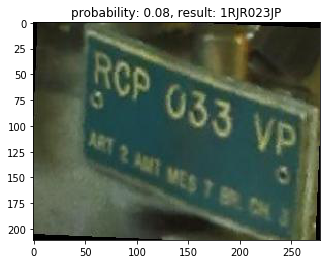

In [6]:
max_pro = 0
max_file = ""
max_text = ""
for filename in path_to_image_files:
    text, probability = model.predict(open(filename, 'rb').read())
    if probability > max_pro:
        max_pro = probability
        max_file = filename
        max_text = text
            
plt.title('probability: %.2f, result: ' % max_pro + str(text))
img=mpimg.imread(max_file)
plt.imshow(img)
plt.show()

# Random croping

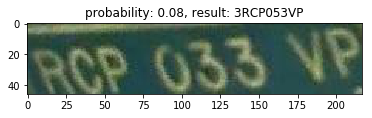

In [13]:
sess = tf.InteractiveSession()
image = mpimg.imread(filename)
reshaped_image = tf.cast(image,tf.float32)
size = tf.cast(tf.shape(reshaped_image).eval(),tf.int32)
height = sess.run(size[0]*3//4)
width = sess.run(size[1]*4//5)
distorted_image = tf.random_crop(reshaped_image,[height,width,3])
distorted_image = tf.cast(distorted_image,tf.uint8)


image = distorted_image.eval()
Image.fromarray(np.asarray(image)).save(imagePath + "1.jpg")

imagePath = "test/"
text, probability = model.predict(open(imagePath + "1.jpg", 'rb').read())

plt.title('probability: %.2f, result: ' % max_pro + str(text))
img=mpimg.imread(imagePath + "1.jpg")
plt.imshow(img)
plt.show()